In [112]:
#import libraries
import requests, zipfile
import pandas as pd
import io
import os
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt
from io import StringIO
import itertools as it
from datetime import datetime
import sklearn as sklearn
np.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [113]:
#declare global variables 
daily_monthly = 'daily'
time_lapse = '4h'
bitcoin_par = 'BTCBUSD'
year_2022 = '2022-'
year_2023 = '2023-'
url = 'https://data.binance.vision/data/spot/'+daily_monthly+'/klines/'+bitcoin_par+'/'+time_lapse+'/'+bitcoin_par+'-'+time_lapse+'-'
zip = '.zip'
#https://data.binance.vision/data/spot/daily/klines/BTCBUSD/4h/BTCBUSD-4h-
print(url)

https://data.binance.vision/data/spot/daily/klines/BTCBUSD/4h/BTCBUSD-4h-


In [114]:
'''
x = np.array([], dtype=np.uint32)
y = np.array([], dtype=np.uint32)
#download the data and unzip
try:
    for year_loop in range(2021, 2024):
        for month_loop in range(1, 13):
            if month_loop in (1,3,5,7,8,10,12):
                days_range = 32
            elif month_loop in (4,6,9,11):
                days_range = 31
            else:
                days_range = 29
            month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
            for day_loop in range(1, days_range):#days_range
                day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
                url_loop = url+str(year_loop)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
                #print(url_loop)
                #requeset info from binance
                #req_loop = requests.get(url_loop, stream=True)
                #print(req_loop.status_code)
                if  ((year_loop  >= 2021 and month_loop >= 3)):#and (year_loop <= 2023 and month_loop <= 1 and day_loop <= 5)
                    #z = zipfile.ZipFile(io.BytesIO(req_loop.content))
                    #z.extractall(os.path.join(os.getcwd(), 'data-btc'))
                    csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(year_loop)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
                    print(csv_name_loop)
                    df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
                    , header = None
                    , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
                    x_time = df[['Open time']].to_numpy(dtype = np.float32)
                    x = np.append(x, x_time)
                    y_price_high = df[['High']].to_numpy(dtype = np.float32)
                    y_price_close = df[['Low']].to_numpy(dtype = np.float32)
                    y_promedio = np.add(y_price_high, y_price_close)
                    y_promedio =  y_promedio/2
                    y = np.append(y, y_promedio)
except:
    print("Error")
#print(df.shape)
#df.head
'''


'\nx = np.array([], dtype=np.uint32)\ny = np.array([], dtype=np.uint32)\n#download the data and unzip\ntry:\n    for year_loop in range(2021, 2024):\n        for month_loop in range(1, 13):\n            if month_loop in (1,3,5,7,8,10,12):\n                days_range = 32\n            elif month_loop in (4,6,9,11):\n                days_range = 31\n            else:\n                days_range = 29\n            month_inloop =  \'0\'+str(month_loop) if month_loop < 10 else str(month_loop)\n            for day_loop in range(1, days_range):#days_range\n                day_inloop = \'0\'+str(day_loop) if day_loop < 10 else str(day_loop)\n                url_loop = url+str(year_loop)+\'-\'+str(month_inloop)+\'-\'+str(day_inloop)+zip\n                #print(url_loop)\n                #requeset info from binance\n                #req_loop = requests.get(url_loop, stream=True)\n                #print(req_loop.status_code)\n                if  ((year_loop  >= 2021 and month_loop >= 3)):#and (yea

In [191]:
x = np.array([], dtype=np.uint32)
y = np.array([], dtype=np.uint32)
#download and charge 2021 from month 3 to month 12
for month_loop in range (3, 12):
    if month_loop in (1,3,5,7,8,10,12):
        days_range = 32
    elif month_loop in (4,6,9,11):
        days_range = 31
    else:
        days_range = 29
    month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
    for day_loop in range(1, days_range):#days_range
        day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
        url_loop = url+str(2021)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
        #print(url_loop)
        #requeset info from binance
        #req_loop = requests.get(url_loop, stream=True)
        #print(req_loop.status_code)
        z = zipfile.ZipFile(io.BytesIO(req_loop.content))
        z.extractall(os.path.join(os.getcwd(), 'data-btc'))
        csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(2021)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
        #print(csv_name_loop)
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy(dtype = np.float32)
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.float32)
        y_price_close = df[['Low']].to_numpy(dtype = np.float32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)
        
#download and charge 2022 all the motnhs
for month_loop in range (1, 12):
    if month_loop in (1,3,5,7,8,10,12):
        days_range = 32
    elif month_loop in (4,6,9,11):
        days_range = 31
    else:
        days_range = 29
    month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
    for day_loop in range(1, days_range):#days_range
        day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
        url_loop = url+str(2022)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
        #print(url_loop)
        #requeset info from binance
        #req_loop = requests.get(url_loop, stream=True)
        #print(req_loop.status_code)
        z = zipfile.ZipFile(io.BytesIO(req_loop.content))
        z.extractall(os.path.join(os.getcwd(), 'data-btc'))
        csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(2022)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
        #print(csv_name_loop)
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy(dtype = np.float32)
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.float32)
        y_price_close = df[['Low']].to_numpy(dtype = np.float32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)
#download and charge 2023 in order of the days 
for month_loop in range (1, 2):
    if month_loop in (1,3,5,7,8,10,12):
        days_range = 32
    elif month_loop in (4,6,9,11):
        days_range = 31
    else:
        days_range = 29
    month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
    for day_loop in range(1, 7):#days_range
        day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
        url_loop = url+str(2023)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
        #print(url_loop)
        #requeset info from binance
        req_loop = requests.get(url_loop, stream=True)
        print(req_loop.status_code)
        z = zipfile.ZipFile(io.BytesIO(req_loop.content))
        z.extractall(os.path.join(os.getcwd(), 'data-btc'))
        csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(2023)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
        #print(csv_name_loop)
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy(dtype = np.float32)
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.float32)
        y_price_close = df[['Low']].to_numpy(dtype = np.float32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)



last_date = datetime.now()
unix_last_date = datetime.timestamp(presentDate)*1000
print(x[-1], unix_last_date)
req_bin_today = requests.get('https://api.binance.com/api/v3/avgPrice?symbol=BTCUSDT', stream=True)
last_price = req_bin_today.json()['price']
print(y[-1], last_price)
x = np.append(x, np.array(unix_last_date))
y = np.append(y, np.array(last_price, dtype = np.float32))
print(last_price)
print(y.shape, x.shape)



200
200
200
200
200
200
1673035251712.0 1673116315524.583
16956.009765625 16938.56714747
16938.56714747
(3691,) (3691,)


In [179]:
df_scal = pd.DataFrame(y)
scaler = MinMaxScaler(feature_range=(0,1))
y_close=scaler.fit_transform(np.array(df_scal).reshape(-1,1))

(3691,)


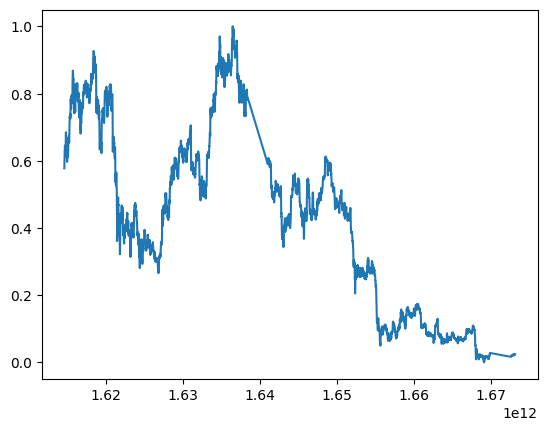

In [180]:
print(y.shape)
#plt.plot(x, y)
plt.plot(x, y_close)
plt.show()

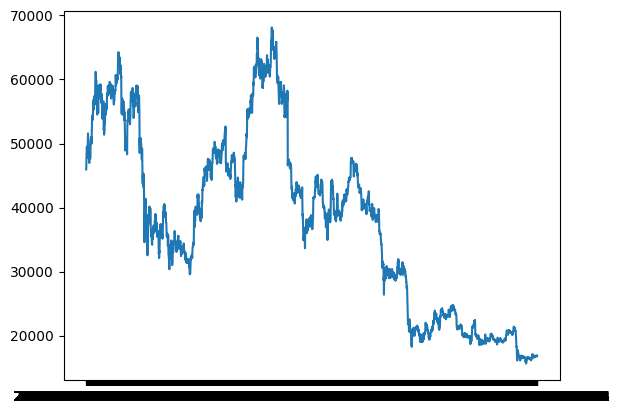

In [195]:
def cast_time_data(np_array):
    x_new_time = []
    for time_unix in np_array:
        new_time = int(str(time_unix)[0:10])
        unixToDatetime = datetime.fromtimestamp(new_time).strftime('%Y-%m-%d %H:%M:%S')
        x_new_time.append(unixToDatetime)
    return np.array(x_new_time)
x_new_time = cast_time_data(x)
plt.plot(x_new_time, scaler.inverse_transform(y_close))
plt.show()

In [196]:
def prepare_y_series(np_array, series_size = 10):
    x_series = []
    y_series = []
    for y_val in range(len(np_array)-series_size):
        x_series.append([[a] for a in np_array[y_val:y_val+series_size]])
        y_series.append(np_array[y_val+series_size])
        #print(np_array[y_val+series_size])
    #print(np.array(y_series))
    return np.array(x_series), np.array(y_series)
x_series_def, y_series_def = prepare_y_series(y_close)
#prepare_data_in_percentage
nint_perc = int(len(x_series_def)*.90)
nintfive_perc = int(len(x_series_def)*.95)
hun_perc = int(len(x_series_def)*1.0)
x_train, y_train = x_series_def[:nint_perc], y_series_def[:nint_perc]
x_valid, y_valid = x_series_def[nint_perc:hun_perc], y_series_def[nint_perc:hun_perc]
x_test, y_test = x_series_def[nintfive_perc:hun_perc], y_series_def[nintfive_perc:hun_perc]
x_plt_train = x[:nint_perc]
x_plt_valid = x[nint_perc:nintfive_perc]
x_plt_test = x[nintfive_perc:hun_perc]

In [197]:
#new maderfucking model
mamfmodel = tf.keras.models.Sequential()
mamfmodel.add(tf.keras.layers.InputLayer((10, 1)))
mamfmodel.add(tf.keras.layers.LSTM(units = 64))
mamfmodel.add(tf.keras.layers.Dense(8, 'relu'))
mamfmodel.add(tf.keras.layers.Dense(1, 'linear'))
mamfmodel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                16896     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [198]:
cp = tf.keras.callbacks.ModelCheckpoint('mamfmodel/', save_best_only=True)
mamfmodel.compile(loss='mean_squared_error', optimizer='adam',metrics= tf.keras.metrics.RootMeanSquaredError())
mamfmodel.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=125, callbacks=[cp])

Epoch 1/125
 93/104 [=========================>....] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1345

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 5s 32ms/step - loss: 0.0163 - root_mean_squared_error: 0.1278 - val_loss: 4.8818e-04 - val_root_mean_squared_error: 0.0221
Epoch 2/125
 92/104 [=========================>....] - ETA: 0s - loss: 6.0105e-04 - root_mean_squared_error: 0.0245

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 31ms/step - loss: 5.9092e-04 - root_mean_squared_error: 0.0243 - val_loss: 2.1103e-04 - val_root_mean_squared_error: 0.0145
Epoch 3/125
 91/104 [=========================>....] - ETA: 0s - loss: 5.3710e-04 - root_mean_squared_error: 0.0232

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 5.4523e-04 - root_mean_squared_error: 0.0234 - val_loss: 6.2876e-05 - val_root_mean_squared_error: 0.0079
Epoch 4/125
104/104 [==============================] - 0s 5ms/step - loss: 5.1358e-04 - root_mean_squared_error: 0.0227 - val_loss: 6.3411e-05 - val_root_mean_squared_error: 0.0080
Epoch 5/125
102/104 [============================>.] - ETA: 0s - loss: 5.0402e-04 - root_mean_squared_error: 0.0225

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 32ms/step - loss: 4.9990e-04 - root_mean_squared_error: 0.0224 - val_loss: 4.9806e-05 - val_root_mean_squared_error: 0.0071
Epoch 6/125
104/104 [==============================] - 0s 4ms/step - loss: 4.6374e-04 - root_mean_squared_error: 0.0215 - val_loss: 1.0840e-04 - val_root_mean_squared_error: 0.0104
Epoch 7/125
100/104 [===========================>..] - ETA: 0s - loss: 4.5080e-04 - root_mean_squared_error: 0.0212

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 4.5912e-04 - root_mean_squared_error: 0.0214 - val_loss: 4.3758e-05 - val_root_mean_squared_error: 0.0066
Epoch 8/125
104/104 [==============================] - 0s 4ms/step - loss: 4.7565e-04 - root_mean_squared_error: 0.0218 - val_loss: 4.9658e-05 - val_root_mean_squared_error: 0.0070
Epoch 9/125
 92/104 [=========================>....] - ETA: 0s - loss: 4.1301e-04 - root_mean_squared_error: 0.0203

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 4.0753e-04 - root_mean_squared_error: 0.0202 - val_loss: 3.8374e-05 - val_root_mean_squared_error: 0.0062
Epoch 10/125
104/104 [==============================] - 0s 4ms/step - loss: 3.8320e-04 - root_mean_squared_error: 0.0196 - val_loss: 3.9934e-05 - val_root_mean_squared_error: 0.0063
Epoch 11/125
100/104 [===========================>..] - ETA: 0s - loss: 3.8347e-04 - root_mean_squared_error: 0.0196

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 3.7953e-04 - root_mean_squared_error: 0.0195 - val_loss: 3.7949e-05 - val_root_mean_squared_error: 0.0062
Epoch 12/125
 90/104 [========================>.....] - ETA: 0s - loss: 3.5443e-04 - root_mean_squared_error: 0.0188

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 3.4904e-04 - root_mean_squared_error: 0.0187 - val_loss: 3.2770e-05 - val_root_mean_squared_error: 0.0057
Epoch 13/125
104/104 [==============================] - 0s 4ms/step - loss: 3.4577e-04 - root_mean_squared_error: 0.0186 - val_loss: 4.2953e-05 - val_root_mean_squared_error: 0.0066
Epoch 14/125
104/104 [==============================] - 0s 4ms/step - loss: 2.9505e-04 - root_mean_squared_error: 0.0172 - val_loss: 3.4504e-05 - val_root_mean_squared_error: 0.0059
Epoch 15/125
103/104 [============================>.] - ETA: 0s - loss: 3.1555e-04 - root_mean_squared_error: 0.0178

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 3.1426e-04 - root_mean_squared_error: 0.0177 - val_loss: 2.7696e-05 - val_root_mean_squared_error: 0.0053
Epoch 16/125
104/104 [==============================] - 0s 4ms/step - loss: 2.7927e-04 - root_mean_squared_error: 0.0167 - val_loss: 5.6747e-05 - val_root_mean_squared_error: 0.0075
Epoch 17/125
 90/104 [========================>.....] - ETA: 0s - loss: 2.8473e-04 - root_mean_squared_error: 0.0169

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 6s 59ms/step - loss: 2.8124e-04 - root_mean_squared_error: 0.0168 - val_loss: 2.4988e-05 - val_root_mean_squared_error: 0.0050
Epoch 18/125
104/104 [==============================] - 0s 4ms/step - loss: 2.5445e-04 - root_mean_squared_error: 0.0160 - val_loss: 2.8274e-05 - val_root_mean_squared_error: 0.0053
Epoch 19/125
104/104 [==============================] - 0s 4ms/step - loss: 2.6551e-04 - root_mean_squared_error: 0.0163 - val_loss: 2.9403e-05 - val_root_mean_squared_error: 0.0054
Epoch 20/125
104/104 [==============================] - 0s 4ms/step - loss: 2.4237e-04 - root_mean_squared_error: 0.0156 - val_loss: 4.2230e-05 - val_root_mean_squared_error: 0.0065
Epoch 21/125
 98/104 [===========================>..] - ETA: 0s - loss: 3.0387e-04 - root_mean_squared_error: 0.0174

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 2.9929e-04 - root_mean_squared_error: 0.0173 - val_loss: 2.4145e-05 - val_root_mean_squared_error: 0.0049
Epoch 22/125
104/104 [==============================] - 0s 4ms/step - loss: 2.5076e-04 - root_mean_squared_error: 0.0158 - val_loss: 3.9705e-05 - val_root_mean_squared_error: 0.0063
Epoch 23/125
 95/104 [==========================>...] - ETA: 0s - loss: 2.4335e-04 - root_mean_squared_error: 0.0156

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 2.3954e-04 - root_mean_squared_error: 0.0155 - val_loss: 2.2351e-05 - val_root_mean_squared_error: 0.0047
Epoch 24/125
104/104 [==============================] - 0s 4ms/step - loss: 2.2121e-04 - root_mean_squared_error: 0.0149 - val_loss: 3.1909e-05 - val_root_mean_squared_error: 0.0056
Epoch 25/125
104/104 [==============================] - ETA: 0s - loss: 2.0182e-04 - root_mean_squared_error: 0.0142

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 2.0182e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.0596e-05 - val_root_mean_squared_error: 0.0045
Epoch 26/125
 93/104 [=========================>....] - ETA: 0s - loss: 1.9287e-04 - root_mean_squared_error: 0.0139

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.9400e-04 - root_mean_squared_error: 0.0139 - val_loss: 1.7591e-05 - val_root_mean_squared_error: 0.0042
Epoch 27/125
 88/104 [========================>.....] - ETA: 0s - loss: 1.9992e-04 - root_mean_squared_error: 0.0141

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 1.9392e-04 - root_mean_squared_error: 0.0139 - val_loss: 1.7244e-05 - val_root_mean_squared_error: 0.0042
Epoch 28/125
104/104 [==============================] - 0s 4ms/step - loss: 1.9890e-04 - root_mean_squared_error: 0.0141 - val_loss: 4.5554e-05 - val_root_mean_squared_error: 0.0067
Epoch 29/125
101/104 [============================>.] - ETA: 0s - loss: 1.9215e-04 - root_mean_squared_error: 0.0139

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 31ms/step - loss: 1.9129e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.5362e-05 - val_root_mean_squared_error: 0.0039
Epoch 30/125
104/104 [==============================] - 0s 4ms/step - loss: 1.7134e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.0005e-05 - val_root_mean_squared_error: 0.0045
Epoch 31/125
104/104 [==============================] - 0s 4ms/step - loss: 1.6732e-04 - root_mean_squared_error: 0.0129 - val_loss: 1.6612e-05 - val_root_mean_squared_error: 0.0041
Epoch 32/125
104/104 [==============================] - 0s 4ms/step - loss: 1.6307e-04 - root_mean_squared_error: 0.0128 - val_loss: 2.2728e-05 - val_root_mean_squared_error: 0.0048
Epoch 33/125
104/104 [==============================] - 0s 4ms/step - loss: 1.5804e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.8080e-05 - val_root_mean_squared_error: 0.0043
Epoch 34/125
104/104 [==============================] - 0s 4ms/step - loss: 1.7822e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 31ms/step - loss: 1.6228e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.2798e-05 - val_root_mean_squared_error: 0.0036
Epoch 37/125
104/104 [==============================] - 0s 4ms/step - loss: 1.7364e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.3605e-05 - val_root_mean_squared_error: 0.0037
Epoch 38/125
104/104 [==============================] - 0s 4ms/step - loss: 1.7593e-04 - root_mean_squared_error: 0.0133 - val_loss: 2.1920e-05 - val_root_mean_squared_error: 0.0047
Epoch 39/125
104/104 [==============================] - 0s 4ms/step - loss: 1.6202e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.6163e-05 - val_root_mean_squared_error: 0.0040
Epoch 40/125
 91/104 [=========================>....] - ETA: 0s - loss: 1.4989e-04 - root_mean_squared_error: 0.0122

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.4561e-04 - root_mean_squared_error: 0.0121 - val_loss: 1.2281e-05 - val_root_mean_squared_error: 0.0035
Epoch 41/125
104/104 [==============================] - 0s 4ms/step - loss: 1.6194e-04 - root_mean_squared_error: 0.0127 - val_loss: 2.2200e-05 - val_root_mean_squared_error: 0.0047
Epoch 42/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3871e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.3917e-05 - val_root_mean_squared_error: 0.0037
Epoch 43/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3734e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.2631e-05 - val_root_mean_squared_error: 0.0036
Epoch 44/125
104/104 [==============================] - 0s 4ms/step - loss: 1.4901e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.2381e-05 - val_root_mean_squared_error: 0.0035
Epoch 45/125
104/104 [==============================] - ETA: 0s - loss: 1.6300e-04 - root_mean_squared

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.6300e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.2253e-05 - val_root_mean_squared_error: 0.0035
Epoch 46/125
 94/104 [==========================>...] - ETA: 0s - loss: 1.4342e-04 - root_mean_squared_error: 0.0120

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.4372e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.2030e-05 - val_root_mean_squared_error: 0.0035
Epoch 47/125
104/104 [==============================] - 0s 4ms/step - loss: 1.4712e-04 - root_mean_squared_error: 0.0121 - val_loss: 1.6249e-05 - val_root_mean_squared_error: 0.0040
Epoch 48/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2454e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.2719e-05 - val_root_mean_squared_error: 0.0036
Epoch 49/125
 91/104 [=========================>....] - ETA: 0s - loss: 1.2786e-04 - root_mean_squared_error: 0.0113

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.2787e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.1622e-05 - val_root_mean_squared_error: 0.0034
Epoch 50/125
 98/104 [===========================>..] - ETA: 0s - loss: 1.3791e-04 - root_mean_squared_error: 0.0117

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.4047e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.0361e-05 - val_root_mean_squared_error: 0.0032
Epoch 51/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2828e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.4708e-05 - val_root_mean_squared_error: 0.0038
Epoch 52/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3561e-04 - root_mean_squared_error: 0.0116 - val_loss: 4.9467e-05 - val_root_mean_squared_error: 0.0070
Epoch 53/125
104/104 [==============================] - 0s 4ms/step - loss: 1.5065e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.7556e-05 - val_root_mean_squared_error: 0.0042
Epoch 54/125
104/104 [==============================] - 0s 4ms/step - loss: 1.6441e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.0364e-05 - val_root_mean_squared_error: 0.0032
Epoch 55/125
104/104 [==============================] - 0s 4ms/step - loss: 1.4013e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.3709e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.0162e-05 - val_root_mean_squared_error: 0.0032
Epoch 57/125
104/104 [==============================] - 1s 5ms/step - loss: 1.3296e-04 - root_mean_squared_error: 0.0115 - val_loss: 2.9311e-05 - val_root_mean_squared_error: 0.0054
Epoch 58/125
104/104 [==============================] - 0s 4ms/step - loss: 1.4655e-04 - root_mean_squared_error: 0.0121 - val_loss: 2.8313e-05 - val_root_mean_squared_error: 0.0053
Epoch 59/125
104/104 [==============================] - 0s 4ms/step - loss: 1.4464e-04 - root_mean_squared_error: 0.0120 - val_loss: 2.6966e-05 - val_root_mean_squared_error: 0.0052
Epoch 60/125
104/104 [==============================] - 0s 4ms/step - loss: 1.4670e-04 - root_mean_squared_error: 0.0121 - val_loss: 1.1200e-05 - val_root_mean_squared_error: 0.0033
Epoch 61/125
103/104 [============================>.] - ETA: 0s - loss: 1.2854e-04 - root_mean_squared

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.2824e-04 - root_mean_squared_error: 0.0113 - val_loss: 9.9179e-06 - val_root_mean_squared_error: 0.0031
Epoch 62/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2592e-04 - root_mean_squared_error: 0.0112 - val_loss: 2.9714e-05 - val_root_mean_squared_error: 0.0055
Epoch 63/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3344e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.3121e-05 - val_root_mean_squared_error: 0.0036
Epoch 64/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3451e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.3991e-05 - val_root_mean_squared_error: 0.0037
Epoch 65/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2139e-04 - root_mean_squared_error: 0.0110 - val_loss: 9.9195e-06 - val_root_mean_squared_error: 0.0031
Epoch 66/125
 93/104 [=========================>....] - ETA: 0s - loss: 1.6201e-04 - root_mean_squared

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 1.5535e-04 - root_mean_squared_error: 0.0125 - val_loss: 9.6898e-06 - val_root_mean_squared_error: 0.0031
Epoch 67/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3759e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.7440e-05 - val_root_mean_squared_error: 0.0042
Epoch 68/125
 94/104 [==========================>...] - ETA: 0s - loss: 1.3393e-04 - root_mean_squared_error: 0.0116

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 6s 60ms/step - loss: 1.3151e-04 - root_mean_squared_error: 0.0115 - val_loss: 9.6289e-06 - val_root_mean_squared_error: 0.0031
Epoch 69/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3589e-04 - root_mean_squared_error: 0.0117 - val_loss: 2.1569e-05 - val_root_mean_squared_error: 0.0046
Epoch 70/125
104/104 [==============================] - 0s 4ms/step - loss: 1.4282e-04 - root_mean_squared_error: 0.0120 - val_loss: 9.9955e-06 - val_root_mean_squared_error: 0.0032
Epoch 71/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2623e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.0080e-05 - val_root_mean_squared_error: 0.0032
Epoch 72/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3612e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.2739e-05 - val_root_mean_squared_error: 0.0036
Epoch 73/125
 93/104 [=========================>....] - ETA: 0s - loss: 1.2905e-04 - root_mean_squared

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 1.2406e-04 - root_mean_squared_error: 0.0111 - val_loss: 9.5342e-06 - val_root_mean_squared_error: 0.0031
Epoch 74/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2947e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.0661e-05 - val_root_mean_squared_error: 0.0033
Epoch 75/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2958e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.1151e-05 - val_root_mean_squared_error: 0.0033
Epoch 76/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2636e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.5580e-05 - val_root_mean_squared_error: 0.0039
Epoch 77/125
104/104 [==============================] - 0s 4ms/step - loss: 1.4634e-04 - root_mean_squared_error: 0.0121 - val_loss: 1.1581e-05 - val_root_mean_squared_error: 0.0034
Epoch 78/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2709e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.3413e-04 - root_mean_squared_error: 0.0116 - val_loss: 9.2468e-06 - val_root_mean_squared_error: 0.0030
Epoch 82/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3310e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.5468e-05 - val_root_mean_squared_error: 0.0039
Epoch 83/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2531e-04 - root_mean_squared_error: 0.0112 - val_loss: 9.8976e-06 - val_root_mean_squared_error: 0.0031
Epoch 84/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2868e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.8402e-05 - val_root_mean_squared_error: 0.0043
Epoch 85/125
104/104 [==============================] - 0s 4ms/step - loss: 1.4215e-04 - root_mean_squared_error: 0.0119 - val_loss: 9.6643e-06 - val_root_mean_squared_error: 0.0031
Epoch 86/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3551e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 1.3304e-04 - root_mean_squared_error: 0.0115 - val_loss: 9.2462e-06 - val_root_mean_squared_error: 0.0030
Epoch 99/125
104/104 [==============================] - 0s 4ms/step - loss: 1.5882e-04 - root_mean_squared_error: 0.0126 - val_loss: 9.3526e-06 - val_root_mean_squared_error: 0.0031
Epoch 100/125
104/104 [==============================] - 0s 4ms/step - loss: 1.1880e-04 - root_mean_squared_error: 0.0109 - val_loss: 2.5133e-05 - val_root_mean_squared_error: 0.0050
Epoch 101/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3619e-04 - root_mean_squared_error: 0.0117 - val_loss: 3.5054e-05 - val_root_mean_squared_error: 0.0059
Epoch 102/125
104/104 [==============================] - 0s 4ms/step - loss: 1.2908e-04 - root_mean_squared_error: 0.0114 - val_loss: 2.0320e-05 - val_root_mean_squared_error: 0.0045
Epoch 103/125
104/104 [==============================] - 0s 4ms/step - loss: 1.3040e-04 - root_mean

6/6 [==============================] - 0s 2ms/step


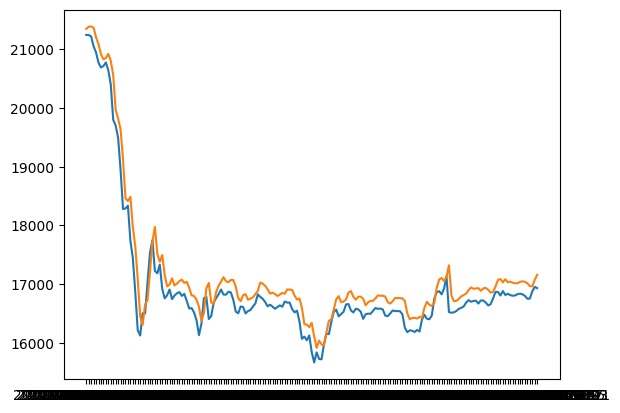

In [199]:
y_pred = mamfmodel.predict(x_test)
y_predict = scaler.inverse_transform(y_pred)
test_predict = scaler.inverse_transform(y_test)

#print(y_pred)
#print(x_plt_test)
plt.plot(cast_time_data(x_plt_test),test_predict)
plt.plot(cast_time_data(x_plt_test),y_predict)
plt.show()

116/116 [==============================] - 0s 1ms/step
(3681,) (3681, 1)


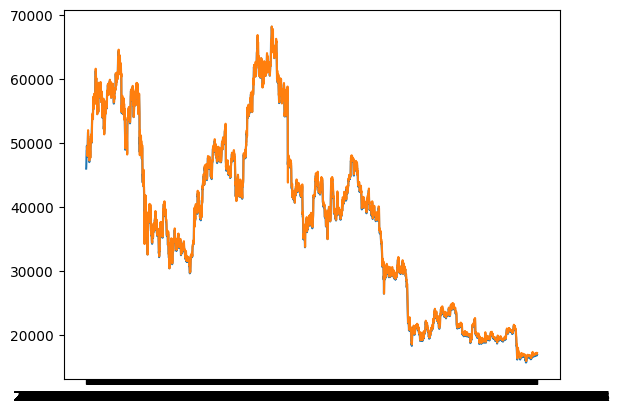

In [206]:
y_pred = mamfmodel.predict(x_series_def)
y_predict = scaler.inverse_transform(y_pred)
x_plot = x[10:]
print(x_plot.shape, y_pred.shape)
plt.plot(cast_time_data(x),y)
plt.plot(cast_time_data(x_plot),y_predict)
plt.show()

1/1 [==============================] - 0s 27ms/step
2023-01-09 08:31:55
[[0.02845314]
 [0.03213616]
 [0.03589494]
 [0.03964426]
 [0.04333537]
 [0.04694602]
 [0.05047103]
 [0.05391541]
 [0.05728669]
 [0.0605901 ]
 [0.06383374]
 [0.06701998]]


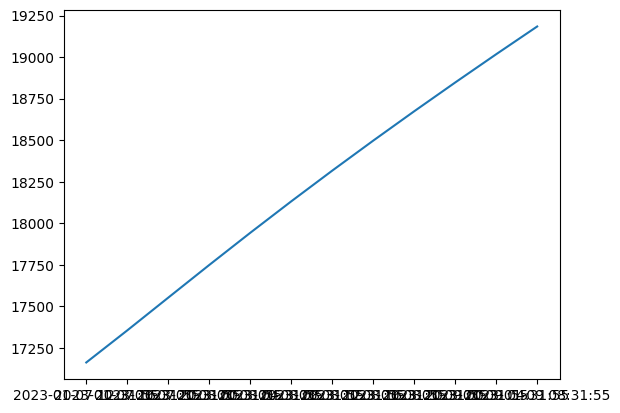

In [208]:
def bracket_list(list):
    new_list = []
    for value in range(len(list)):
        new_value = [list[value]]
        new_list.append(new_value)
    return np.array([new_list])

def predict_next_days(model_ker : tf.keras.models, data , days = 1, hours = 4):
    new_data = data
    last_days = []
    last_series = np.array([data[-1]])
    '''
    pred = mamfmodel.predict(last_series).flatten()
    new_pred_series = np.delete(last_series, 0)
    new_pred_series = np.append(new_pred_series, pred)
    new_pred_series = bracket_list(new_pred_series)
    last_series = new_pred_series
    '''
    for i in range(days*hours):
        pred = mamfmodel.predict(last_series).flatten()
        new_pred_series = np.delete(last_series, 0)
        new_pred_series = np.append(new_pred_series, pred)
        new_pred_series = bracket_list(new_pred_series)
        last_series = new_pred_series
        last_days.append(pred)
    return np.array(last_days)

def add_days(x_ser, days = 1, hours = 4):
    new_days = []
    new_day = x_ser[-1] #+ 4*60*60*1000
    #range_h = int(24/hours)
    for i in range(days*hours):
        new_days.append(new_day)
        new_day += 4*60*60*1000
    return np.array(new_days)


#print(y_close.shape)
x_next_days = add_days(x, days = 3)
y_next_pred = predict_next_days(mamfmodel, x_series_def , 3)
#new_time = int(str(time_unix)[0:10])
#unixToDatetime = datetime.fromtimestamp(new_time).strftime('%Y-%m-%d %H:%M:%S')
last_day = x_next_days[-1]
last_day = int(str(last_day)[0:10])
last_date = datetime.fromtimestamp(last_day).strftime('%Y-%m-%d %H:%M:%S')
print(last_date)
print(y_next_pred)
plt.plot(cast_time_data(x_next_days),scaler.inverse_transform(y_next_pred))